# CPSC380: 2_numpy_5_masking

In this notebook, you will learn:
 - Boolean array
 - Example: Counting Rainy Days
 
Read more: 
 - textbook
 - [Numpy website] (https://numpy.org/).

In [3]:
import numpy as np

## 1. Boolean array

In [4]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [5]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

#### Counting entries

To count the number of ``True`` entries in a Boolean array, ``np.count_nonzero`` is useful:

In [6]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

In [7]:
np.sum(x < 6)

8

In [8]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [9]:
# are there any values greater than 8?
np.any(x > 8)

True

In [10]:
# are there any values less than zero?
np.any(x < 0)

False

In [11]:
# are all values less than 10?
np.all(x < 10)

True

In [12]:
# are all values equal to 6?
np.all(x == 6)

False

``np.all`` and ``np.any`` can be used along particular axes as well. For example:

In [13]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

#### Boolean Arrays as Masks

In the preceding section we looked at aggregates computed directly on Boolean arrays.
A more powerful pattern is to use Boolean arrays as masks, to select particular subsets of the data themselves.
Returning to our ``x`` array from before, suppose we want an array of all values in the array that are less than, say, 5:

In [14]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

We can obtain a Boolean array for this condition easily, as we've already seen:

In [15]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

Now to *select* these values from the array, we can simply index on this Boolean array; this is known as a **masking** operation:

In [16]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

#### Keywords and/or Versus the Operators &/|

 - ``and`` and ``or`` gauge the truth or falsehood of *entire object*
 - ``&`` and ``|`` refer to *bits within each object*

In [17]:
bool(42), bool(0)

(True, False)

In [18]:
bool(42 and 0)

False

In [19]:
bool(42 or 0)

True

When you use ``&`` and ``|`` on integers, the expression operates on the bits of the element, applying the *and* or the *or* to the individual bits making up the number:

In [20]:
print(bin(42))
print(bin(59))
print(bin(42 & 59))
print(bin(42 | 59))

0b101010
0b111011
0b101010
0b111011


In [21]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

Using ``or`` on these arrays will try to evaluate the truth or falsehood of the entire array object, which is not a well-defined value:

In [23]:
#A or B

Similarly, when doing a Boolean expression on a given array, you should use ``|`` or ``&`` rather than ``or`` or ``and``:

In [26]:
x = np.arange(10)
print (x>4)
print (x<8)

print((x > 4) & (x < 8))

[False False False False False  True  True  True  True  True]
[ True  True  True  True  True  True  True  True False False]
[False False False False False  True  True  True False False]


Trying to evaluate the truth or falsehood of the entire array will give the same ``ValueError`` we saw previously:

In [ ]:
#(x > 4) and (x < 8)

So remember this: ``and`` and ``or`` perform a single Boolean evaluation on an entire object, while ``&`` and ``|`` perform multiple Boolean evaluations on the content (the individual bits or bytes) of an object.
For Boolean NumPy arrays, the latter is nearly always the desired operation.

## 2 Example: Counting Rainy Days

The dataset was the daily rainfall statistics for the city of Seattle in 2014

In [40]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

df=pd.read_csv('data/Seattle2014.csv')
df.head(2)

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999


In [39]:
# use pandas to extract rainfall inches as a NumPy array
rainfall = df['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

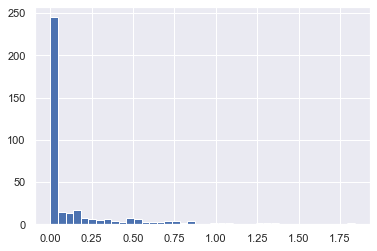

In [41]:
plt.hist(inches, 40);

In [51]:

np.sum((inches > 0.5) & (inches < 1))


29

In [24]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

In [54]:
print("Number days without rain:      ", '{:4d}'.format(np.sum(inches == 0)))
print("Number days with rain:         ", '{:4d}'.format(np.sum(inches != 0)))
print("Days with more than 0.5 inches:", '{:4d}'.format(np.sum(inches > 0.5)))
print("Rainy days with < 0.2 inches  :", '{:4d}'.format(np.sum((inches > 0) &
                                                (inches < 0.2))))

Number days without rain:        215
Number days with rain:           150
Days with more than 0.5 inches:   37
Rainy days with < 0.2 inches  :   75


In [53]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      '{:.4f}'.format(np.median(inches[rainy])))
print("Median precip on summer days in 2014 (inches):  ",
      '{:.4f}'.format(np.median(inches[summer])))
print("Maximum precip on summer days in 2014 (inches): ",
      '{:.4f}'.format(np.max(inches[summer])))
print("Median precip on non-summer rainy days (inches):",
      '{:.4f}'.format(np.median(inches[rainy & ~summer])))

Median precip on rainy days in 2014 (inches):    0.1949
Median precip on summer days in 2014 (inches):   0.0000
Maximum precip on summer days in 2014 (inches):  0.8504
Median precip on non-summer rainy days (inches): 0.2008


By combining Boolean operations, masking operations, and aggregates, we can very quickly answer these sorts of questions for our dataset.

## 2. ``np.sort`` and ``np.argsort``

In [42]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

If you prefer to sort the array in-place, you can instead use the ``sort`` method of arrays:

In [43]:
x.sort()
print(x)

[1 2 3 4 5]


A related function is ``argsort``, which instead returns the *indices* of the sorted elements:

In [44]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


#### Sorting along rows or columns

A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the ``axis`` argument. For example:

In [45]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [46]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [47]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

## Partial Sorts: Partitioning

Sometimes we're not interested in sorting the entire array, but simply want to find the *k* smallest values in the array. NumPy provides this in the ``np.partition`` function. ``np.partition`` takes an array and a number *K*; the result is a new array with the smallest *K* values to the left of the partition, and the remaining values to the right, in arbitrary order:

In [48]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values.
Within the two partitions, the elements have arbitrary order.

Similarly to sorting, we can partition along an arbitrary axis of a multidimensional array:

In [49]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

The result is an array where the first two slots in each row contain the smallest values from that row, with the remaining values filling the remaining slots.

Finally, just as there is a ``np.argsort`` that computes indices of the sort, there is a ``np.argpartition`` that computes indices of the partition.
We'll see this in action in the following section.